## Boston House

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for inline display of graphs or any visualization that we do
%matplotlib inline
import scipy
import sklearn

In [2]:
boston=pd.read_excel('C:\\Users\\tarun\\Data Scientist\\Housing data\\hou_all.xlsx')
boston.keys()

Index(['CRIM:', 'ZN:', 'INDUS:', 'CHAS:', 'NOX:', 'RM:', 'AGE:', 'DIS:',
       'RAD:', 'TAX:', 'PTRATIO:', 'B:', 'LSTAT:', 'MEDV:', 'BIAS_COL'],
      dtype='object')

In [3]:
boston.head(2)
boston=boston.drop('BIAS_COL',axis=1)
boston.head(2)

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:,MEDV:
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [4]:
# The most important step I have to do after loading dataset is to check for missing values
boston.isnull().sum()

CRIM:       0
ZN:         0
INDUS:      0
CHAS:       0
NOX:        0
RM:         0
AGE:        0
DIS:        0
RAD:        0
TAX:        0
PTRATIO:    0
B:          0
LSTAT:      0
MEDV:       0
dtype: int64

In [5]:
# exploratory data analysis
#correlation super super impoertant in regression models or plroblems
#pearson correlation checks if it is +ve correlated or -ve correlated
#two types of corelatin we need to check are co relation b/w independent features and corr b/w dependent features.If there is high corr b/w independent features at
#that time we can remove one of the independent features because that is what we called multicoreniality so in linear regression also we really need to check 
# what is multicoreniality. In that case we can drop one of the independent feature  and can take the other one. The other correlation we need to focus 
# is b/w independent feature and dependent feature(in this case it is price that is target feature).
boston.corr()

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:,MEDV:
CRIM:,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN:,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS:,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS:,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX:,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM:,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE:,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS:,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD:,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX:,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
#import seaborn as sn
#sn.pairplot(boston)

Text(0, 0.5, 'Price')

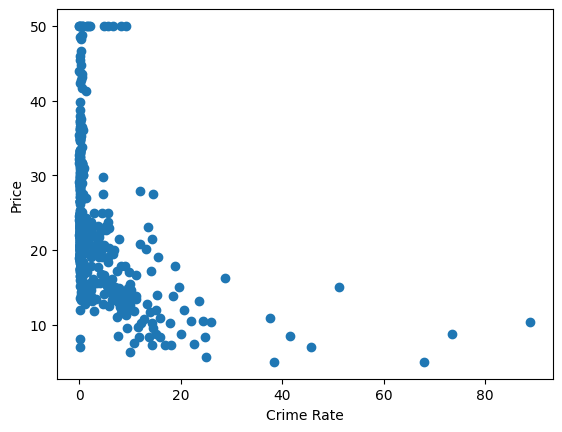

In [7]:
plt.scatter(boston['CRIM:'],boston['MEDV:'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

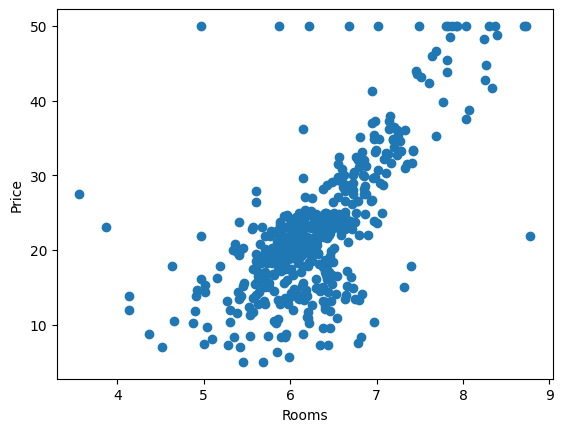

In [8]:
plt.scatter(boston['RM:'],boston['MEDV:'])
plt.xlabel("Rooms")
plt.ylabel("Price")

<Axes: xlabel='RM:', ylabel='MEDV:'>

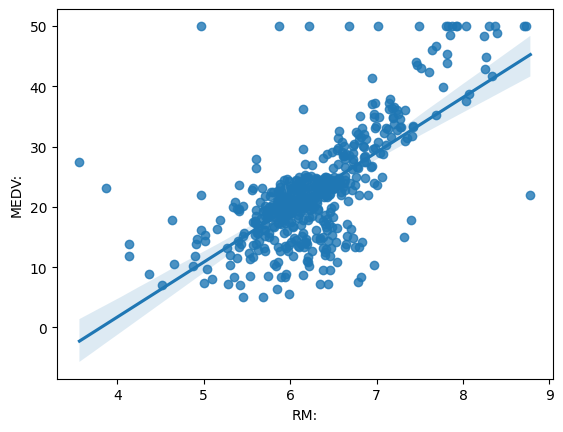

In [9]:
import seaborn as sn
sn.regplot(x='RM:',y='MEDV:',data=boston) #For creating regression plot

<Axes: xlabel='LSTAT:', ylabel='MEDV:'>

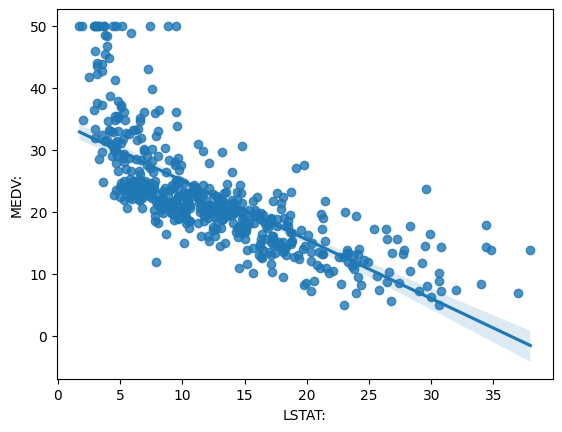

In [10]:
sn.regplot(x='LSTAT:',y='MEDV:',data=boston) #For creating regression plot


<Axes: xlabel='CHAS:', ylabel='MEDV:'>

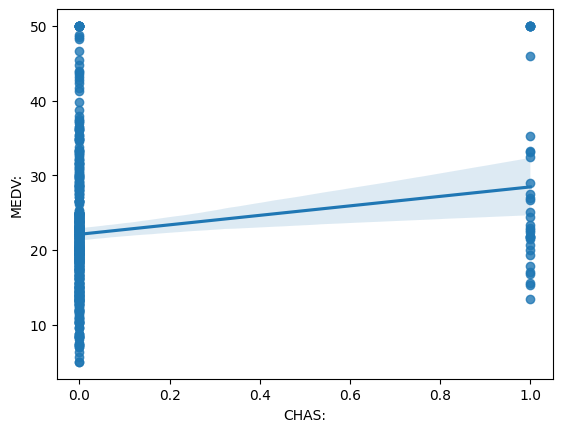

In [11]:
sn.regplot(x='CHAS:',y='MEDV:',data=boston) #For creating regression plot


<Axes: xlabel='PTRATIO:', ylabel='MEDV:'>

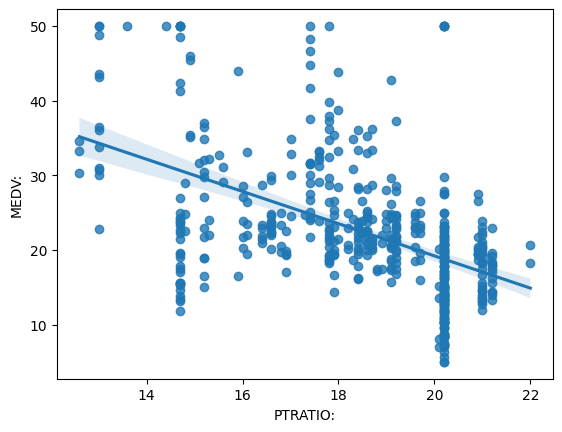

In [12]:
sn.regplot(x='PTRATIO:',y='MEDV:',data=boston) #For creating regression plot


In [13]:
# Independent and dependent features
X=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

In [14]:
X.head(2)

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [15]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV:, dtype: float64

In [17]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [20]:
X_test

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,385.96,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,394.54,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,100.19,16.22


In [21]:
##Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [26]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [27]:
# For X_test we don't have to write fit_transform 
X_test=scaler.transform(X_test)
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]])

## Modeling training

In [30]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [31]:
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
## Print the coefficient and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [33]:
print(regression.intercept_)

23.01581920903955


In [34]:
## on which parameters the model has been trained
regression.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [36]:
## Prediction with test_data
reg_pred=regression.predict(X_test)
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

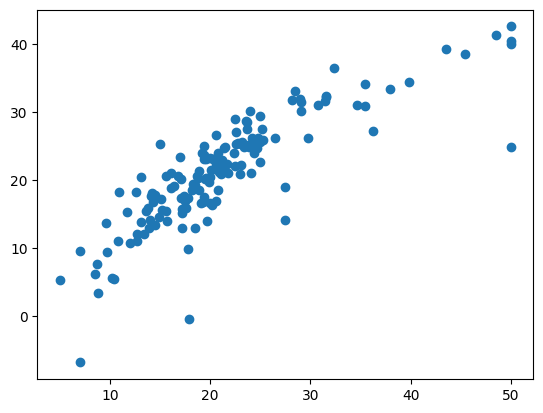

In [38]:
## Plot a scatter plotv for predictions
plt.scatter(y_test,reg_pred) 

In [40]:
residuals=y_test-reg_pred                    
residuals                          # Residual is error with respect to regression prediction

173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: MEDV:, Length: 152, dtype: float64

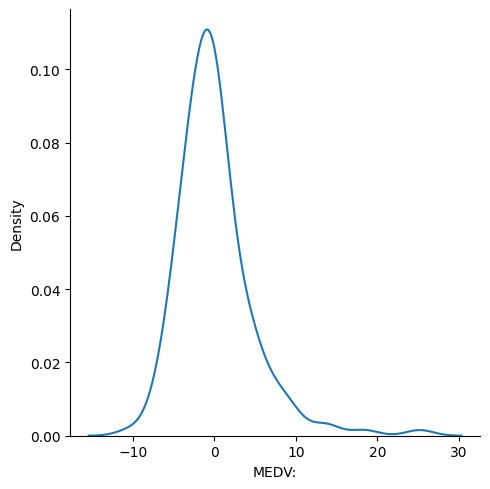

In [41]:
## Prediction with residuals
sn.displot(residuals,kind='kde')      # On right hand of this graph w can see that there are some outliers.

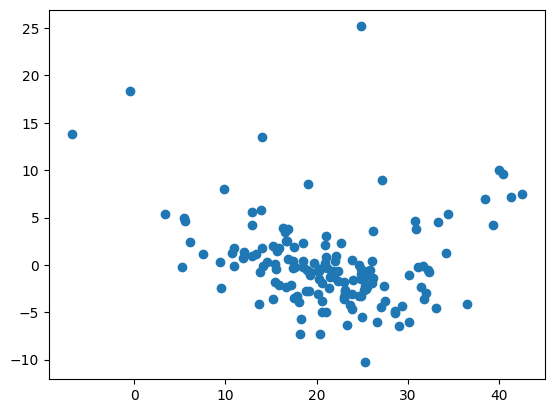

In [43]:
## Scatter plot with respect to predictions and residuals
# In this graph we can seee there is uniform distribution plots
plt.scatter(reg_pred,residuals)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574062
21.517444231177212
4.638689926172821


## R Square and Adjusted R square another type of metrics
-- Formula
# R^2=1-SSR/SST
R^2 is coefficient of determination-----SSR=Sum of Square Residuals------SST=Total Sum of Squares 

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred
)


# Adjusted R^2=1-[(1-R^2)*(n-1)/(n-k-1)]
# R^2= R^2 of model 
# n---->The number of Observations 
# K---->The number of Predictor variables

